<h1 align='center'> 영상처리 프로그래밍 실습 10</h1>

<h6 align='right'> 2022. 5. 24. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;&nbsp;          학번:    &nbsp;&nbsp;         학과(전공):
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 5월 30일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [2]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 지난 주 문제 1. 
 
다음 조건을 만족하는 함수 perspective_projection_transform(img) 함수를 작성하라.

- 입력 영상과 perspective projection transform된 영상을 OpenCV의 윈도우에 나란히 표시한다
- 왼쪽 영상에 4 각형의 네 점의 위치를 다음 순서대로 마우스로 클릭하면 4 각형을 그린다.
- 사각형이 완성되면 perspective projection transform된 영상을 오른쪽에 표시한다.
- perspective projection transform 출력 영상의 크기는 입력 영상의 크기와 같다

In [3]:
from os.path import exists
def perspective_projection_transform(img):
    
    def onWarpTransform(event, x, y, flags, param):
        nonlocal idx, src, img_line
        
        if event == cv2.EVENT_LBUTTONUP:
            src[idx] = [x,y]
            idx += 1
            
            if idx == 1:
                img_line = img.copy()
            if 2 <= idx < 4:
                cv2.line(img_line, src[idx-2], src[idx-1], (0,0,255), 3)
            elif idx == 4:
                cv2.line(img_line, src[2], src[3], (0,0,255), 3)
                cv2.line(img_line, src[3], src[0], (0,0,255), 3)
            img2 = np.hstack((img_line, img))
            cv2.imshow(winName, img2)
            if idx == 4:
                idx = 0
                transform()
                
    def transform():
        nonlocal img2
        dst = np.float32([[0,0], [0, img.shape[0]-1], [img.shape[1]-1, img.shape[0]-1], [img.shape[1]-1, 0]])

        perspective_mat = cv2.getPerspectiveTransform(np.float32(src[:4]), dst)
        transformed = cv2.warpPerspective(img, perspective_mat, (img.shape[1], img.shape[0]), cv2.INTER_CUBIC)
        img2 = np.hstack((img_line, transformed))
        cv2.imshow(winName, img2)


    winName = "Geometric Transformation of Image"
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )

    img_line = img.copy()
    img2 = np.hstack((img_line, img))

    src = [ [0,0], [0,0], [0,0], [0,0], [0,0]]
    idx = 0
    
    cv2.imshow(winName, img2)

    cv2.setMouseCallback(winName, onWarpTransform)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
img = cv2.imread('social-media_640.jpg')
perspective_projection_transform(img)

## 지난 주 예제 9. 
'tallest_640.jpg' 파일을 읽고 이 사진에 있는 건물들을 정면에서 보는 효과를 얻도록 변환하라.

In [5]:
img = cv2.imread('tallest_640.jpg')
perspective_projection_transform(img)

## 예제 1.

'beach_640.jpg' 파읽을 읽고 k-Means algorithm을 이용해서 5 개의 색만으로 벡터 양자화한 후에,
원 영상과 벡터 양자화된 영상을 나란히 표시하라.

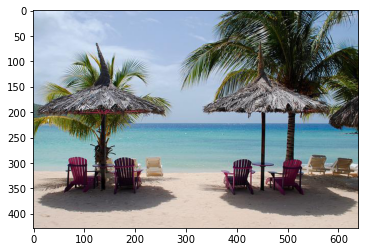

In [2]:
from sklearn import cluster
from sklearn.utils import shuffle

beach = plt.imread('beach_640.jpg')

plt.imshow(beach)

In [7]:
K = 5
img = beach.reshape(-1, 3)
beach.shape, img.shape

((428, 640, 3), (273920, 3))

In [8]:
N = 3000
img_sample = shuffle(img, random_state=0)[:N]
kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)

In [9]:
cluster_centers = kmeans.cluster_centers_.round().clip(0, 255).astype(np.uint8)   # 5개의 RGB값

In [10]:
img_labels = kmeans.predict(img)

In [11]:
np.unique(img_labels), img_labels.shape

(array([0, 1, 2, 3, 4]), (273920,))

In [12]:
img_vq = cluster_centers[img_labels]
img_vq

array([[195, 201, 211],
       [195, 201, 211],
       [195, 201, 211],
       ...,
       [195, 201, 211],
       [195, 201, 211],
       [195, 201, 211]], dtype=uint8)

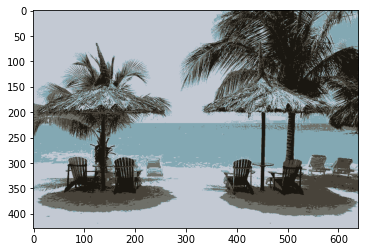

In [13]:
plt.imshow(img_vq.reshape(beach.shape))  # 5개의 색으로 바꿈

## 예제 2.

예제 1의 프로그램을 다음과 같이 수정하라.

- OpenCV의 trackBar interface를 이용해서 k-Means의 cluster 개수를 조정하면서 벡터 양자화된 영상을 윈도우에 표시하라. 단, cluster 개수의 최솟값은 1로 설정하고, cluster의 개수가 1인 경우에는 원 영상을 표시하라. 따라서 실제 cluster의 최솟값은 2가 된다.


In [ ]:
def onKMeans(val):
    global K, img_vq, kmeans
    K = val
    
    if K == 1:
        img_vq = img_org
        
    else:
        kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)
        quantized_colors = kmeans.cluster_centers_.round().clip(0, 255).astype(np.uint8)   
        img_labels = kmeans.predict(img).reshape(img_org.shape[:2])
        img_vq = quantized_colors[img_labels]

    cv2.imshow(winName, img_vq)

file_name = 'beach_640.jpg'
img_org = cv2.imread(file_name)

img = img_org.reshape(-1, 3)
K = 2
N = 3000
img_sample = shuffle(img, random_state=0)[:N]
kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)
cluster_centers = kmeans.cluster_centers_.round().clip(0, 255).astype(np.uint8)   
img_labels = kmeans.predict(img).reshape(img_org.shape[:2])
img_vq = cluster_centers[img_labels]

winName = 'K-Means VQ'
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, img_vq)

cv2.createTrackbar('K', winName, K, 31, onKMeans)
cv2.setTrackbarMin('K', winName, 1)
cv2.waitKey()
cv2.destroyAllWindows()

## 예제 3.

아래 셀의 프로그램을 실행해서 Matplotlib의 colormap을 사용하는 방법을 익혀 보자.

Matplotlib에서 colormap을 선택하는 방법을 아래 URL을 참고하라.

https://matplotlib.org/stable/tutorials/colors/colormaps.html

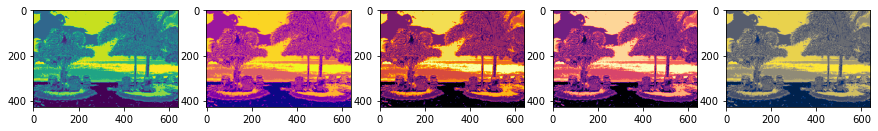

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn import cluster

img_org = plt.imread('beach_640.jpg')
K = 13
N = 3000
img = img_org.reshape(-1, 3)
img_sample = shuffle(img, random_state=0)[:N]

kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)
img_labels = kmeans.predict(img).reshape(beach.shape[:2])

cmap = cm.viridis
cmaps = [cm.viridis, cm.plasma, cm.inferno, cm.magma, cm.cividis]

fig, ax = plt.subplots(ncols=len(cmaps), nrows=1, figsize=(15,3))

for n, cmap in enumerate(cmaps):
    ax[n].imshow(img_labels, cmap=cmap)

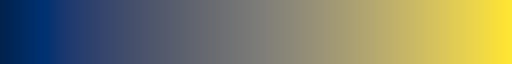

In [24]:
cmap

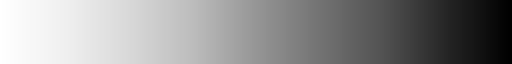

In [100]:
plt.get_cmap(cm.Greys)

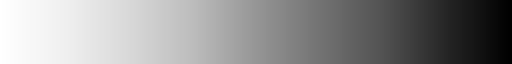

In [96]:
cm.Greys

## 예제 4. 

sklearn.decomposition 패키지의 PCA 클래스에는
주 성분 축을 찾는 fit_transform()과 
주 성분 공간의 벡터를 원래 차원으로 되돌리는 inverse_transform() 이 있다.

'beach_640.jpg' 파일을 읽고, r, g, b 성분의 각 채널 영상을 100 개의 주성분으로 차원을 축소한 후에
다시 inverse_transform 함수를 이용하여 원래 영상을 복원한 후에, r, g, b 채널을 다시 하나의 컬러 영상으로 복원하여 화면에 표시하라.

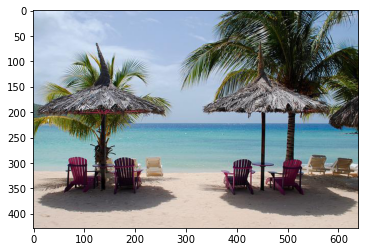

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA

img = plt.imread('beach_640.jpg')
plt.imshow(img)
plt.show()

In [17]:
img_r = img[...,0]
img_g = img[...,1]
img_b = img[...,2]

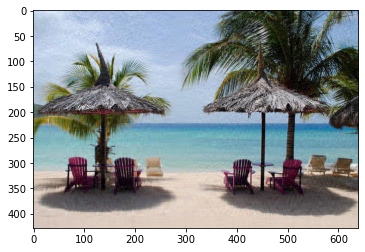

In [18]:
pca = PCA(101)
img_r_transformes = pca.fit_transform(img_r)
img_r_inverse = pca.inverse_transform(img_r_transformes)
img_r_inverse = img_r_inverse.round().clip(0,255).astype(np.uint8)

img_g_transformes = pca.fit_transform(img_g)
img_g_inverse = pca.inverse_transform(img_g_transformes)
img_g_inverse = img_g_inverse.round().clip(0,255).astype(np.uint8)

img_b_transformes = pca.fit_transform(img_b)
img_b_inverse = pca.inverse_transform(img_b_transformes)
img_b_inverse = img_b_inverse.round().clip(0,255).astype(np.uint8)

img_inverse = np.dstack((img_r_inverse, img_g_inverse, img_b_inverse))

plt.imshow(img_inverse, cmap='gray')  # n개만 남겼다 다시 재생한 이미지

## 문제 1.


예제 2를 다음과 같이 변경하라.

- k-Means algorithm으로 구한 cluster centers 대신에 임의의 색을 지정하는 방법으로 벡터 양자화한 영상의 색을 변경하라.
- Matplotlib의 cm 모듈이 제공하는 colormap 중에서 다음과 같은 Listed color maps를 사용하라. trackbar 2개. (K와 list index)

listed_color_maps = [cm.viridis, cm.plasma, cm.inferno, 
                     cm.magma, cm.cividis, cm.twilight, cm.twilight_shifted]
                     
      

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn import cluster

In [52]:
def onKMeans(val):
    global K, img_vq
    
    K = val
    Kmeans2cmap()
    
def onCmap(val):
    global idx, img_vq
    
    idx = val-1
    Kmeans2cmap()
    
def Kmeans2cmap():
    global K, img_vq
    img_vq = img_org
    if K > 1:
        kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)
        quantized_colors = kmeans.cluster_centers_.round().clip(0, 255).astype(np.uint8)   
        img_labels = kmeans.predict(img).reshape(img_org.shape[:2])
        img_vq = quantized_colors[img_labels]
    if idx >= 0:
        img_vq = cv2.applyColorMap(img_vq, listed_color_maps[idx])
    cv2.imshow(winName, img_vq)
    
    
file_name = 'beach_640.jpg'
img_org = cv2.imread(file_name)

listed_color_maps1 = [cm.viridis, cm.plasma, cm.inferno, cm.magma, cm.cividis, cm.twilight, cm.twilight_shifted]
listed_color_maps = [cv2.COLORMAP_VIRIDIS, cv2.COLORMAP_PLASMA, cv2.COLORMAP_INFERNO, cv2.COLORMAP_MAGMA,
                     cv2.COLORMAP_CIVIDIS, cv2.COLORMAP_TWILIGHT, cv2.COLORMAP_TWILIGHT_SHIFTED]

idx = -1

img = img_org.reshape(-1, 3)
K = 2
N = 3000
img_sample = shuffle(img, random_state=0)[:N]
kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)
cluster_centers = kmeans.cluster_centers_.round().clip(0, 255).astype(np.uint8)   
img_labels = kmeans.predict(img).reshape(img_org.shape[:2])
img_vq = cluster_centers[img_labels]

winName = 'K-Means VQ'
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, img_vq)

cv2.createTrackbar('K', winName, K, 31, onKMeans)
cv2.setTrackbarMin('K', winName, 1)
cv2.createTrackbar('Color maps', winName, 0, len(listed_color_maps), onCmap)

cv2.waitKey()
cv2.destroyAllWindows()